In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
sns.set_theme()

### Regresión logística
Modelos para la $i$-ésima observación y 2 características
Regresión lineal: 
$$y_i=\theta_0+\theta_1x_{i1}+\theta_2x_{i2}$$
$$y_i=\boldsymbol{x}_i^T\cdot \boldsymbol{\theta}$$
$$\boldsymbol{x}_i^T=(1,x_{i1},x_{i2})$$
Función logística:
$$sigmoid(z)=\frac{1}{1+e^{-z}}$$


In [60]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Entropía cruzada binaria

$$L(\theta_0,\theta_1,\theta_2,...,\theta_n)=-\frac{1}{m}\sum_{i=1}^{m}y_ilog(\widehat{y_i}+\epsilon)+(1-y_i)log(1-\widehat{y_i}+\epsilon)$$

$$L(\boldsymbol{\theta})=-\frac{1}{m}(\mathbf{y}^{T}\cdot log(\mathbf{\widehat{y}}+\epsilon)+(1-\mathbf{y})^{T}\cdot log(1-\mathbf{\widehat{y}}+\epsilon))$$

donde, $\widehat{y_i}$ es la salida predicha para la $i$-ésima observación o muestra: 
$$\widehat{y_i}=sigmoid(y_i)=\frac{1}{1+e^{-\boldsymbol{x}_i^T\cdot \boldsymbol{\theta}}}$$

In [61]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

### Gradiente de la función de pérdida
$$\nabla L(\boldsymbol{\theta})=\boldsymbol{X}^T\cdot (\mathbf{\widehat{y}}-\mathbf{y})$$

$$\nabla L(\boldsymbol{\theta})=\boldsymbol{X}^T\cdot (sigmoid(\boldsymbol{X}^T \cdot \boldsymbol{\theta})-\mathbf{y})$$

In [62]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [63]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


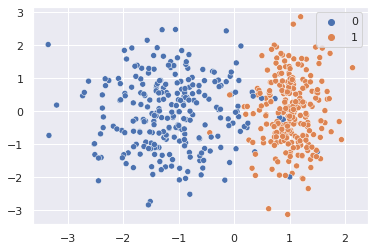

In [64]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_redundant=0,
                           n_informative=1,
                           n_clusters_per_class=1,
                           random_state=14)

y = y[:,np.newaxis]
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

In [65]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



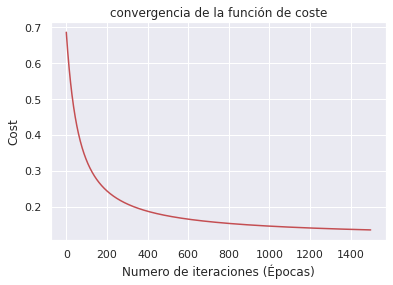

In [66]:
plt.figure()
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("convergencia de la función de coste")
plt.xlabel("Numero de iteraciones (Épocas)")
plt.ylabel("Cost")
plt.show()

In [67]:
y_pred = predict(X, params_optimal)
acc = float(sum(y_pred == y))/ float(len(y))

print('Accuracy :', acc)

Accuracy : 0.966


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


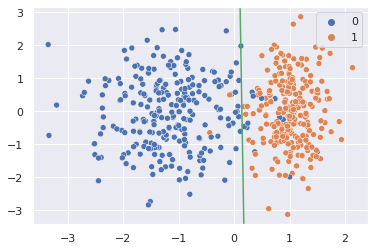

In [68]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="g");